In [103]:
import numpy as np 
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

Sampling from distributions

In [104]:
params = {
    'd1' : [np.array([0, 0]), np.diag([1.6, 1.6]), 100],
    'd2' : [np.array([2.5, 2.5]), np.array([[0.8, -0.6], [-0.6, 0.8]]), 50],
    'd3' : [np.array([-2.5, 2.5]), np.array([[0.8, 0.6], [0.6, 0.8]]), 50],
    'd4' : [np.array([-2.5, -2.5]), np.array([[0.8, -0.6], [-0.6, 0.8]]), 50],
    'd5' : [np.array([2.5, -2.5]), np.array([[0.8, 0.6], [0.6, 0.8]]), 50],
}


In [105]:
samples = []
for key in params.keys():
    sample = np.random.multivariate_normal(
        mean=params[key][0], cov=params[key][1], size=params[key][2]
    )
    labels = np.full(params[key][2], key)
    samples.append(pd.DataFrame(sample, columns=['x_1', 'x_2']).assign(label=labels))

samples = pd.concat(samples, ignore_index= True)
samples

,x_1,x_2,label
0,0.534148,-2.150005,d1
1,-0.136734,-1.428757,d1
2,-2.049214,0.710105,d1
3,-0.365650,1.011283,d1
4,-1.188352,0.548012,d1
...,...,...,...
295,1.896484,-2.458491,d5
296,1.889482,-3.224937,d5
297,3.026968,-1.061384,d5
298,1.483941,-2.994381,d5


kmeans algorithm

In [106]:
k_mean = KMeans(n_clusters=len(params.keys()),max_iter=2)

In [107]:
k_mean.fit(samples[['x_1', 'x_2']])

KMeans(max_iter=2, n_clusters=5)

In [108]:
in_means = k_mean.cluster_centers_
labels = k_mean.labels_

samples['k_mean label'] = labels 
print(in_means)

samples

[[-0.10656825  0.3426703 ]
 [-2.29798525 -2.33147846]
 [ 2.3257095  -2.10347712]
 [ 2.58429531  2.21743078]
 [-2.71892792  2.39105477]]


,x_1,x_2,label,k_mean label
0,0.534148,-2.150005,d1,2
1,-0.136734,-1.428757,d1,0
2,-2.049214,0.710105,d1,4
3,-0.365650,1.011283,d1,0
4,-1.188352,0.548012,d1,0
...,...,...,...,...
295,1.896484,-2.458491,d5,2
296,1.889482,-3.224937,d5,2
297,3.026968,-1.061384,d5,2
298,1.483941,-2.994381,d5,2


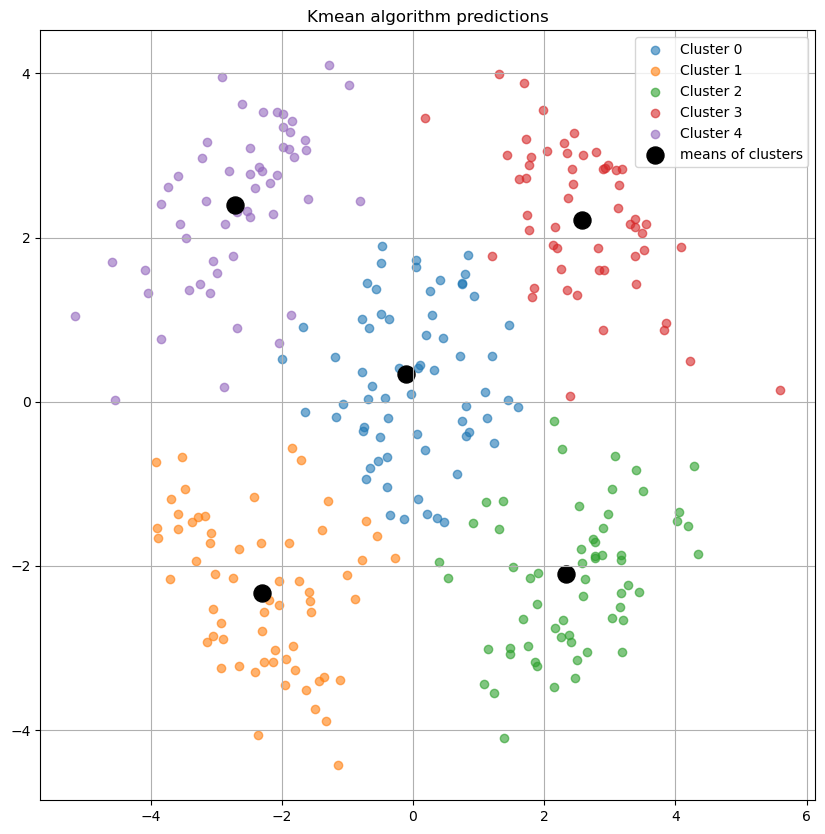

In [109]:
colors = ["green", "red", "blue", "yellow", "black"]


plt.figure(figsize = (10,10))
for j in range(k_mean.n_clusters):
    cluster_samples = samples[samples['k_mean label'] == j]
    plt.scatter(cluster_samples['x_1'],cluster_samples['x_2'], label=f"Cluster {j}", alpha=0.6)

plt.scatter(in_means[:, 0], in_means[:, 1], marker = 'o', color = 'black', alpha=1, sizes=[150], label = 'means of clusters')
plt.grid()
plt.title('Kmean algorithm predictions')
plt.legend()


Now the EM algorithm

In [110]:
num_clusters = k_mean.n_clusters

covs = []
priors = np.zeros(num_clusters)



for cluster in range(num_clusters):
    cluster_samples = samples[samples["k_mean label"] == cluster][["x_1", "x_2"]]
    cov_matrix = np.cov(cluster_samples.T)
    covs.append(cov_matrix)
    
    priors[cluster] = len(cluster_samples) / len(samples)
    

In [111]:
gmm = GaussianMixture(
    n_components=5, 
    means_init=in_means, 
    covariance_type='full', 
    max_iter=100 
)

In [112]:
gmm.fit(samples[['x_1', 'x_2']])

GaussianMixture(means_init=array([[-0.10656825,  0.3426703 ],
       [-2.29798525, -2.33147846],
       [ 2.3257095 , -2.10347712],
       [ 2.58429531,  2.21743078],
       [-2.71892792,  2.39105477]]),
                n_components=5)

In [113]:
fin_means = gmm.means_

print(f'initial means was \n{in_means}\n After EM-algorithm final means become \n{fin_means} ')

initial means was 
[[-0.10656825  0.3426703 ]
 [-2.29798525 -2.33147846]
 [ 2.3257095  -2.10347712]
 [ 2.58429531  2.21743078]
 [-2.71892792  2.39105477]]
 After EM-algorithm final means become 
[[-0.02792123 -0.02745945]
 [-2.58403143 -2.42413199]
 [ 2.68872809 -2.25632523]
 [ 2.65301776  2.35934128]
 [-2.71502427  2.56101957]] 


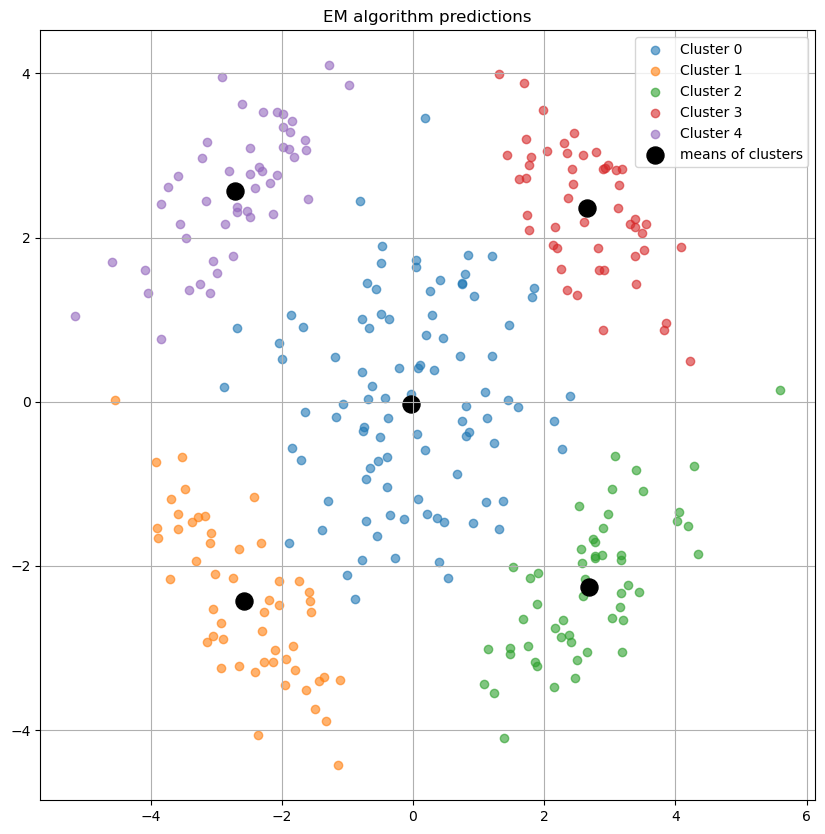

In [114]:
samples['gmm labels'] = gmm.predict(samples[['x_1', 'x_2']])


plt.figure(figsize = (10,10))
for j in range(num_clusters):
    cluster_samples = samples[samples['gmm labels'] == j]
    plt.scatter(cluster_samples['x_1'],cluster_samples['x_2'], label=f"Cluster {j}", alpha=0.6)

plt.scatter(fin_means[:, 0], fin_means[:, 1], marker = 'o', color = 'black', alpha=1, sizes=[150], label = 'means of clusters')
plt.grid()
plt.title('EM algorithm predictions')
plt.legend()